<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Proyek Akhir KASDAD**
###**Kelompok Kasdat: Topik Meramal Cuaca (MC)**

KASDAT


*   Devina Fitri Handayani - 2006531781
*   Fauzan Andri - 2006524593
*   Irsyad Nurachim Fadjar - 2006464820
*   Nasywa Kamila - 2006486885





## Business Understanding

Ada tujuan, permasalahan, dan kebutuhan dari objek analisis. Ada parameter batasan dan kriteria keberhasilan/kesuksesan analisis. Ada metode yang digunakan untuk menjawab studi kasus.

- Mencari hubungan fitur terhadap jumlah curah hujan harian
- Mencari pasangan kota yang dekat dengan geografis
- Mencari letak daerah suatu kota
- Mencari mencari rata - rata jumlah curah hujan beserta nilainya

## Data Understanding



Dataset Meramal Cuaca (MC) terdiri atas dua data, yaitu `Data Harian` dan `Data Jam`. Data Harian memiliki **14730 baris** dan Data Jam memiliki **353520 baris**.


terdapat **17 kolom** pada data harian dan **27 kolom** pada data jam. detail kolom-kolom tersebut adalah sebagai berikut:

**Data harian:**

* `Id` - id cuaca
* `time` - Tanggal pencatatan
* `temperature_2m_max (°C)` - Temperatur udara tertinggi pada ketinggian 2 m di atas permukaan
* `temperature_2m_min (°C)` - Temperatur udara terendah pada ketinggian 2 m di atas permukaan
* `apparent_temperature_max (°C)` - Temperatur semu maksimum yang terasa
* `apparent_temperature_min (°C)` - Temperatur semu minimum yang terasa
* `sunrise (iso8601)` - Waktu matahariterbit pada hari itu dengan format ISO 8601
* `sunset (iso8601)` - Waktu mataharitenggelam pada hari itu dengan format ISO 8601
* `shortwave_radiation_sum (MJ/m²)` - Total radiasi matahari pada haritersebut
* `rain_sum (mm)` - Jumlah curah hujan pada hari tersebut - Target Regresi
* `snowfall` - Jumlah salju pada haritersebut
* `precipitation` - Jumlah curah hujan harian (termasuk hujan, hujan lebat, dan salju)
* `windspeed_10m_max (km/h)` - Kecepatan angin maksimum pada ketinggian 10 m
* `windgusts_10m_max (km/h)` - Kecepatan angin minimum pada ketinggian 10 m
* `winddirection_10m_dominant (°)` - Arah angin dominan pada haritersebut
* `city` - Nama kota yang tercatat
* `class` - Jenis/kelompok curah hujan harian - Target Klasifikasi

**Data Jam:**
* `time` - Tanggal dan jam pencatatan
* `temperature_2m (°C)` - Temperatur pada ketinggian 2 m
* `relativehumidity_2m (%)` - Kelembapan pada ketinggian 2 m
* `winddirection_100m (°)` - Arah angin pada ketinggian 100 m
* `windgusts_10m (km/h)` - Kecepatan angin ketika terdapat angin kencang
* `et0_fao_evapotranspiration (mm)` - Jumlah evapotranspirasi (evaporasi dan transpirasi) pada jam tersebut
* `vapor_pressure_deficit (kPa)` - Perbedaan tekanan uap air dari udara dengan tekanan uap air ketika udara tersaturasi
* `soil_temperature_0_to_7cm (°C)` - Rata-rata temperatur tanah pada kedalaman 0-7 cm
* `soil_temperature_7_to_28cm (°C)` - Rata-rata temperatur tanah pada kedalaman 7-28 cm
* `soil_temperature_28_to_100cm (°C)` - Rata-rata temperatur tanah pada kedalaman 28-100 cm
* `soil_temperature_100_to_255cm (°C)` - Rata-rata temperatur tanah pada kedalaman 100-255 cm
* `soil_moisture_0_to_7cm (m³/m³)` - Rata-rata kelembapan air pada tanah untuk kedalaman 0-7 cm
* `soil_moisture_7_to_28cm (m³/m³)` - Rata-rata kelembapan air pada tanah untuk kedalaman 7-28 cm
* `dewpoint_2m (°C)` - Titik embun; suhu ambang udara mengembun
* `apparent_temperature (°C)` - Temperatur semu yang dirasakan
* `pressure_msl (hPa)` - Tekanan udara pada ketinggian permukaan air laut rata-rata (mean sea level)
* `surface_pressure (hPa)` - Tekanan udara pada ketinggian permukaan daerah tersebut
* `snowfall (cm)` - Jumlah hujan salju pada jam tersebut
* `cloudcover_low (%)` - Persentase cloud cover pada awan sampai ketinggian 2 km
* `cloudcover_mid (%)` - Persentase cloud cover pada ketinggian 2-6 km
* `cloudcover_high (%)` - Persentase cloud cover pada ketinggian di atas 6 km
* `windspeed_10m (km/h)` - Kecepatan angin pada ketinggian 10 m
* `windspeed_100m (km/h)` - Kecepatan angin pada ketinggian 100 m
* `winddirection_10m (°)` - Arah angin pada ketinggian 10 m
* `soil_moisture_28_to_100cm (m³/m³)` - Rata-rata kelembapan air pada tanah untuk kedalaman 28-100 cm
* `soil_moisture_100_to_255cm (m³/m³)` - Rata-rata kelembapan air pada tanah untuk kedalaman 100-255 cm
* `city` - Nama kota

## Reading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import re

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, ElasticNet, HuberRegressor, RANSACRegressor, TheilSenRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# dataJamanDownloaded = drive.CreateFile({'id':'14mTR39Y6NhFfAwz6m7q3JjAKJPQnmFlI'})
# dataJamanDownloaded.GetContentFile('train_harian.csv')
# dataHarianDownloaded = drive.CreateFile({'id':'1kcb-zkYu-UzAcLM2VfTBgZ8MsIvpdHlK'})
# dataHarianDownloaded.GetContentFile('train_jaman.csv')

In [ ]:
# Download datasets
!gdown 1kcb-zkYu-UzAcLM2VfTBgZ8MsIvpdHlK
!gdown 14mTR39Y6NhFfAwz6m7q3JjAKJPQnmFlI

Downloading...
From: https://drive.google.com/uc?id=1kcb-zkYu-UzAcLM2VfTBgZ8MsIvpdHlK
To: /content/train_jaman.csv
100% 53.8M/53.8M [00:01<00:00, 52.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=14mTR39Y6NhFfAwz6m7q3JjAKJPQnmFlI
To: /content/train_harian.csv
100% 1.98M/1.98M [00:00<00:00, 15.2MB/s]


In [ ]:
df_train_harian = pd.read_csv('train_harian.csv')
df_train_harian.head()

,id,time,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),city,snowfall,precipitation,rain_sum (mm),class
0,0,2018-01-01 00:00:00,33.2,24.3,39.0,28.8,2018-01-01 05:41:14,2018-01-01 18:09:47,10.8,23.0,257.02213,23.82,B,0.0,1.800000,1.800000,Hujan Ringan
1,1,2018-01-02 00:00:00,33.0,25.1,40.0,29.2,2018-01-02 05:41:45,2018-01-02 18:10:12,9.5,19.4,230.53691,22.72,B,0.0,2.300000,2.300000,Hujan Ringan
2,2,2018-01-03 00:00:00,31.3,24.9,38.3,30.3,2018-01-03 05:42:14,2018-01-03 18:10:35,11.1,23.8,275.63590,22.92,B,0.0,11.099999,11.099999,Hujan Sedang
3,3,2018-01-04 00:00:00,31.2,25.9,37.8,31.8,2018-01-04 05:42:43,2018-01-04 18:10:58,11.0,31.7,241.11348,17.70,B,0.0,16.400000,16.400000,Hujan Sedang
4,4,2018-01-05 00:00:00,29.6,25.4,34.3,29.6,2018-01-05 05:43:12,2018-01-05 18:11:20,17.3,33.1,246.59671,9.61,B,0.0,10.800000,10.800000,Hujan Sedang


In [ ]:
df_train_harian.shape

(14730, 17)

In [ ]:
df_train_jaman = pd.read_csv('train_jaman.csv')
df_train_jaman.head()

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),snowfall (cm),pressure_msl (hPa),surface_pressure (hPa),cloudcover_low (%),cloudcover_mid (%),...,windgusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),city
0,2018-01-01 00:00:00,25.4,91.0,23.9,30.6,0.0,1008.0,1005.8,7.0,10.0,...,9.4,28.1,28.4,28.3,28.7,0.326,0.315,0.282,0.27,B
1,2018-01-01 01:00:00,25.2,92.0,23.8,30.0,0.0,1007.4,1005.2,16.0,21.0,...,10.1,28.0,28.3,28.3,28.7,0.325,0.315,0.282,0.27,B
2,2018-01-01 02:00:00,25.1,92.0,23.8,29.8,0.0,1006.9,1004.7,7.0,8.0,...,14.8,28.0,28.2,28.3,28.7,0.324,0.315,0.283,0.27,B
3,2018-01-01 03:00:00,24.5,93.0,23.3,28.9,0.0,1006.0,1003.8,5.0,4.0,...,15.1,27.4,28.1,28.3,28.7,0.323,0.315,0.283,0.27,B
4,2018-01-01 04:00:00,24.3,94.0,23.3,28.9,0.0,1005.9,1003.7,2.0,3.0,...,14.0,27.2,28.0,28.3,28.7,0.322,0.315,0.283,0.27,B


In [ ]:
df_train_jaman.shape

(353520, 27)

In [ ]:
def check_values(df):
    data = []
    for col in df.columns:
        data.append([col, \
                  df[col].dtype, \
                  df[col].isna().sum(), \
                  round(100*(df[col].isna().sum()/len(df)), 2), \
                  df[col].nunique(), \
                  df[col].unique()
                  ])

    return pd.DataFrame(columns=['kolom', 'dataType', 'null', 'nullPercentage', 'unique', 'values'], data=data)

In [ ]:
check_values(df_train_harian)

,kolom,dataType,null,nullPercentage,unique,values
0,id,int64,0,0.00,14730,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,time,object,0,0.00,1473,"[2018-01-01 00:00:00, 2018-01-02 00:00:00, 201..."
2,temperature_2m_max (°C),object,0,0.00,989,"[33.2, 33.0, 31.3, 31.2, 29.6, 31.1, 30.0, 29...."
3,temperature_2m_min (°C),float64,0,0.00,586,"[24.3, 25.1, 24.9, 25.9, 25.4, 24.7, 25.3, 23...."
4,apparent_temperature_max (°C),float64,0,0.00,761,"[39.0, 40.0, 38.3, 37.8, 34.3, 35.7, 34.6, 36...."
5,apparent_temperature_min (°C),float64,0,0.00,701,"[28.8, 29.2, 30.3, 31.8, 29.6, 28.5, 29.5, 30...."
6,sunrise (iso8601),object,0,0.00,13917,"[2018-01-01 05:41:14, 2018-01-02 05:41:45, 201..."
7,sunset (iso8601),object,0,0.00,13881,"[2018-01-01 18:09:47, 2018-01-02 18:10:12, 201..."
8,windspeed_10m_max (km/h),float64,0,0.00,442,"[10.8, 9.5, 11.1, 11.0, 17.3, 16.1, 15.0, 14.1..."
9,windgusts_10m_max (km/h),float64,0,0.00,231,"[23.0, 19.4, 23.8, 31.7, 33.1, 38.9, 29.5, 29...."


In [ ]:
check_values(df_train_jaman)

,kolom,dataType,null,nullPercentage,unique,values
0,time,object,0,0.0,35352,"[2018-01-01 00:00:00, 2018-01-01 01:00:00, 201..."
1,temperature_2m (°C),float64,0,0.0,693,"[25.4, 25.2, 25.1, 24.5, 24.3, 24.4, 26.1, 29...."
2,relativehumidity_2m (%),float64,0,0.0,82,"[91.0, 92.0, 93.0, 94.0, 90.0, 86.0, 71.0, 66...."
3,dewpoint_2m (°C),float64,0,0.0,691,"[23.9, 23.8, 23.3, 22.9, 23.4, 23.6, 23.7, 23...."
4,apparent_temperature (°C),float64,0,0.0,839,"[30.6, 30.0, 29.8, 28.9, 28.8, 29.9, 31.1, 34...."
5,snowfall (cm),float64,0,0.0,26,"[0.0, 0.07, 0.14, 0.35, 0.63, 0.84, 0.98, 1.05..."
6,pressure_msl (hPa),float64,0,0.0,810,"[1008.0, 1007.4, 1006.9, 1006.0, 1005.9, 1006...."
7,surface_pressure (hPa),float64,0,0.0,1023,"[1005.8, 1005.2, 1004.7, 1003.8, 1003.7, 1004...."
8,cloudcover_low (%),float64,0,0.0,101,"[7.0, 16.0, 5.0, 2.0, 1.0, 0.0, 4.0, 8.0, 6.0,..."
9,cloudcover_mid (%),float64,0,0.0,101,"[10.0, 21.0, 8.0, 4.0, 3.0, 0.0, 1.0, 11.0, 13..."


##Data Preprocessing

#### *Handle* Missing Value

In [ ]:
df_train_harian.drop(['precipitation' , 'snowfall'], axis=1, inplace=True)

In [ ]:
# mengecek nilai null
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

In [ ]:
check_null(df_train_harian)

Tidak ditemukan missing value pada dataset


In [ ]:
check_null(df_train_jaman)

Tidak ditemukan missing value pada dataset


#### Handle Duplicate Value

In [ ]:
df_train_harian.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14725    False
14726    False
14727    False
14728    False
14729    False
Length: 14730, dtype: bool

In [ ]:
df_train_jaman.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
353515    False
353516    False
353517    False
353518    False
353519    False
Length: 353520, dtype: bool

In [ ]:
print("Jumlah duplikasi data : " + str(df_train_harian.duplicated().sum()))

Jumlah duplikasi data : 0


In [ ]:
print("Jumlah duplikasi data : " + str(df_train_jaman.duplicated().sum()))

Jumlah duplikasi data : 0


#### Check Outliers

In [ ]:
num_df_harian = df_train_harian.select_dtypes(include=['int64', 'float64'])
print(num_df_harian.columns)

Index(['id', 'temperature_2m_min (°C)', 'apparent_temperature_max (°C)',
       'apparent_temperature_min (°C)', 'windspeed_10m_max (km/h)',
       'windgusts_10m_max (km/h)', 'winddirection_10m_dominant (°)',
       'shortwave_radiation_sum (MJ/m²)', 'rain_sum (mm)'],
      dtype='object')


In [ ]:
num_df_jaman = df_train_jaman.select_dtypes(include=['int64', 'float64'])
print(num_df_jaman.columns)

Index(['temperature_2m (°C)', 'relativehumidity_2m (%)', 'dewpoint_2m (°C)',
       'apparent_temperature (°C)', 'snowfall (cm)', 'pressure_msl (hPa)',
       'surface_pressure (hPa)', 'cloudcover_low (%)', 'cloudcover_mid (%)',
       'cloudcover_high (%)', 'et0_fao_evapotranspiration (mm)',
       'vapor_pressure_deficit (kPa)', 'windspeed_10m (km/h)',
       'windspeed_100m (km/h)', 'winddirection_10m (°)',
       'winddirection_100m (°)', 'windgusts_10m (km/h)',
       'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)',
       'soil_temperature_28_to_100cm (°C)',
       'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)',
       'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)',
       'soil_moisture_100_to_255cm (m³/m³)'],
      dtype='object')


In [ ]:
cat_df_harian = df_train_harian.drop(num_df_harian, axis = 1)
print(cat_df_harian.columns)

Index(['time', 'temperature_2m_max (°C)', 'sunrise (iso8601)',
       'sunset (iso8601)', 'city', 'class'],
      dtype='object')


In [ ]:
cat_df_jaman = df_train_jaman.drop(num_df_jaman, axis = 1)
print(cat_df_jaman.columns)

Index(['time', 'city'], dtype='object')


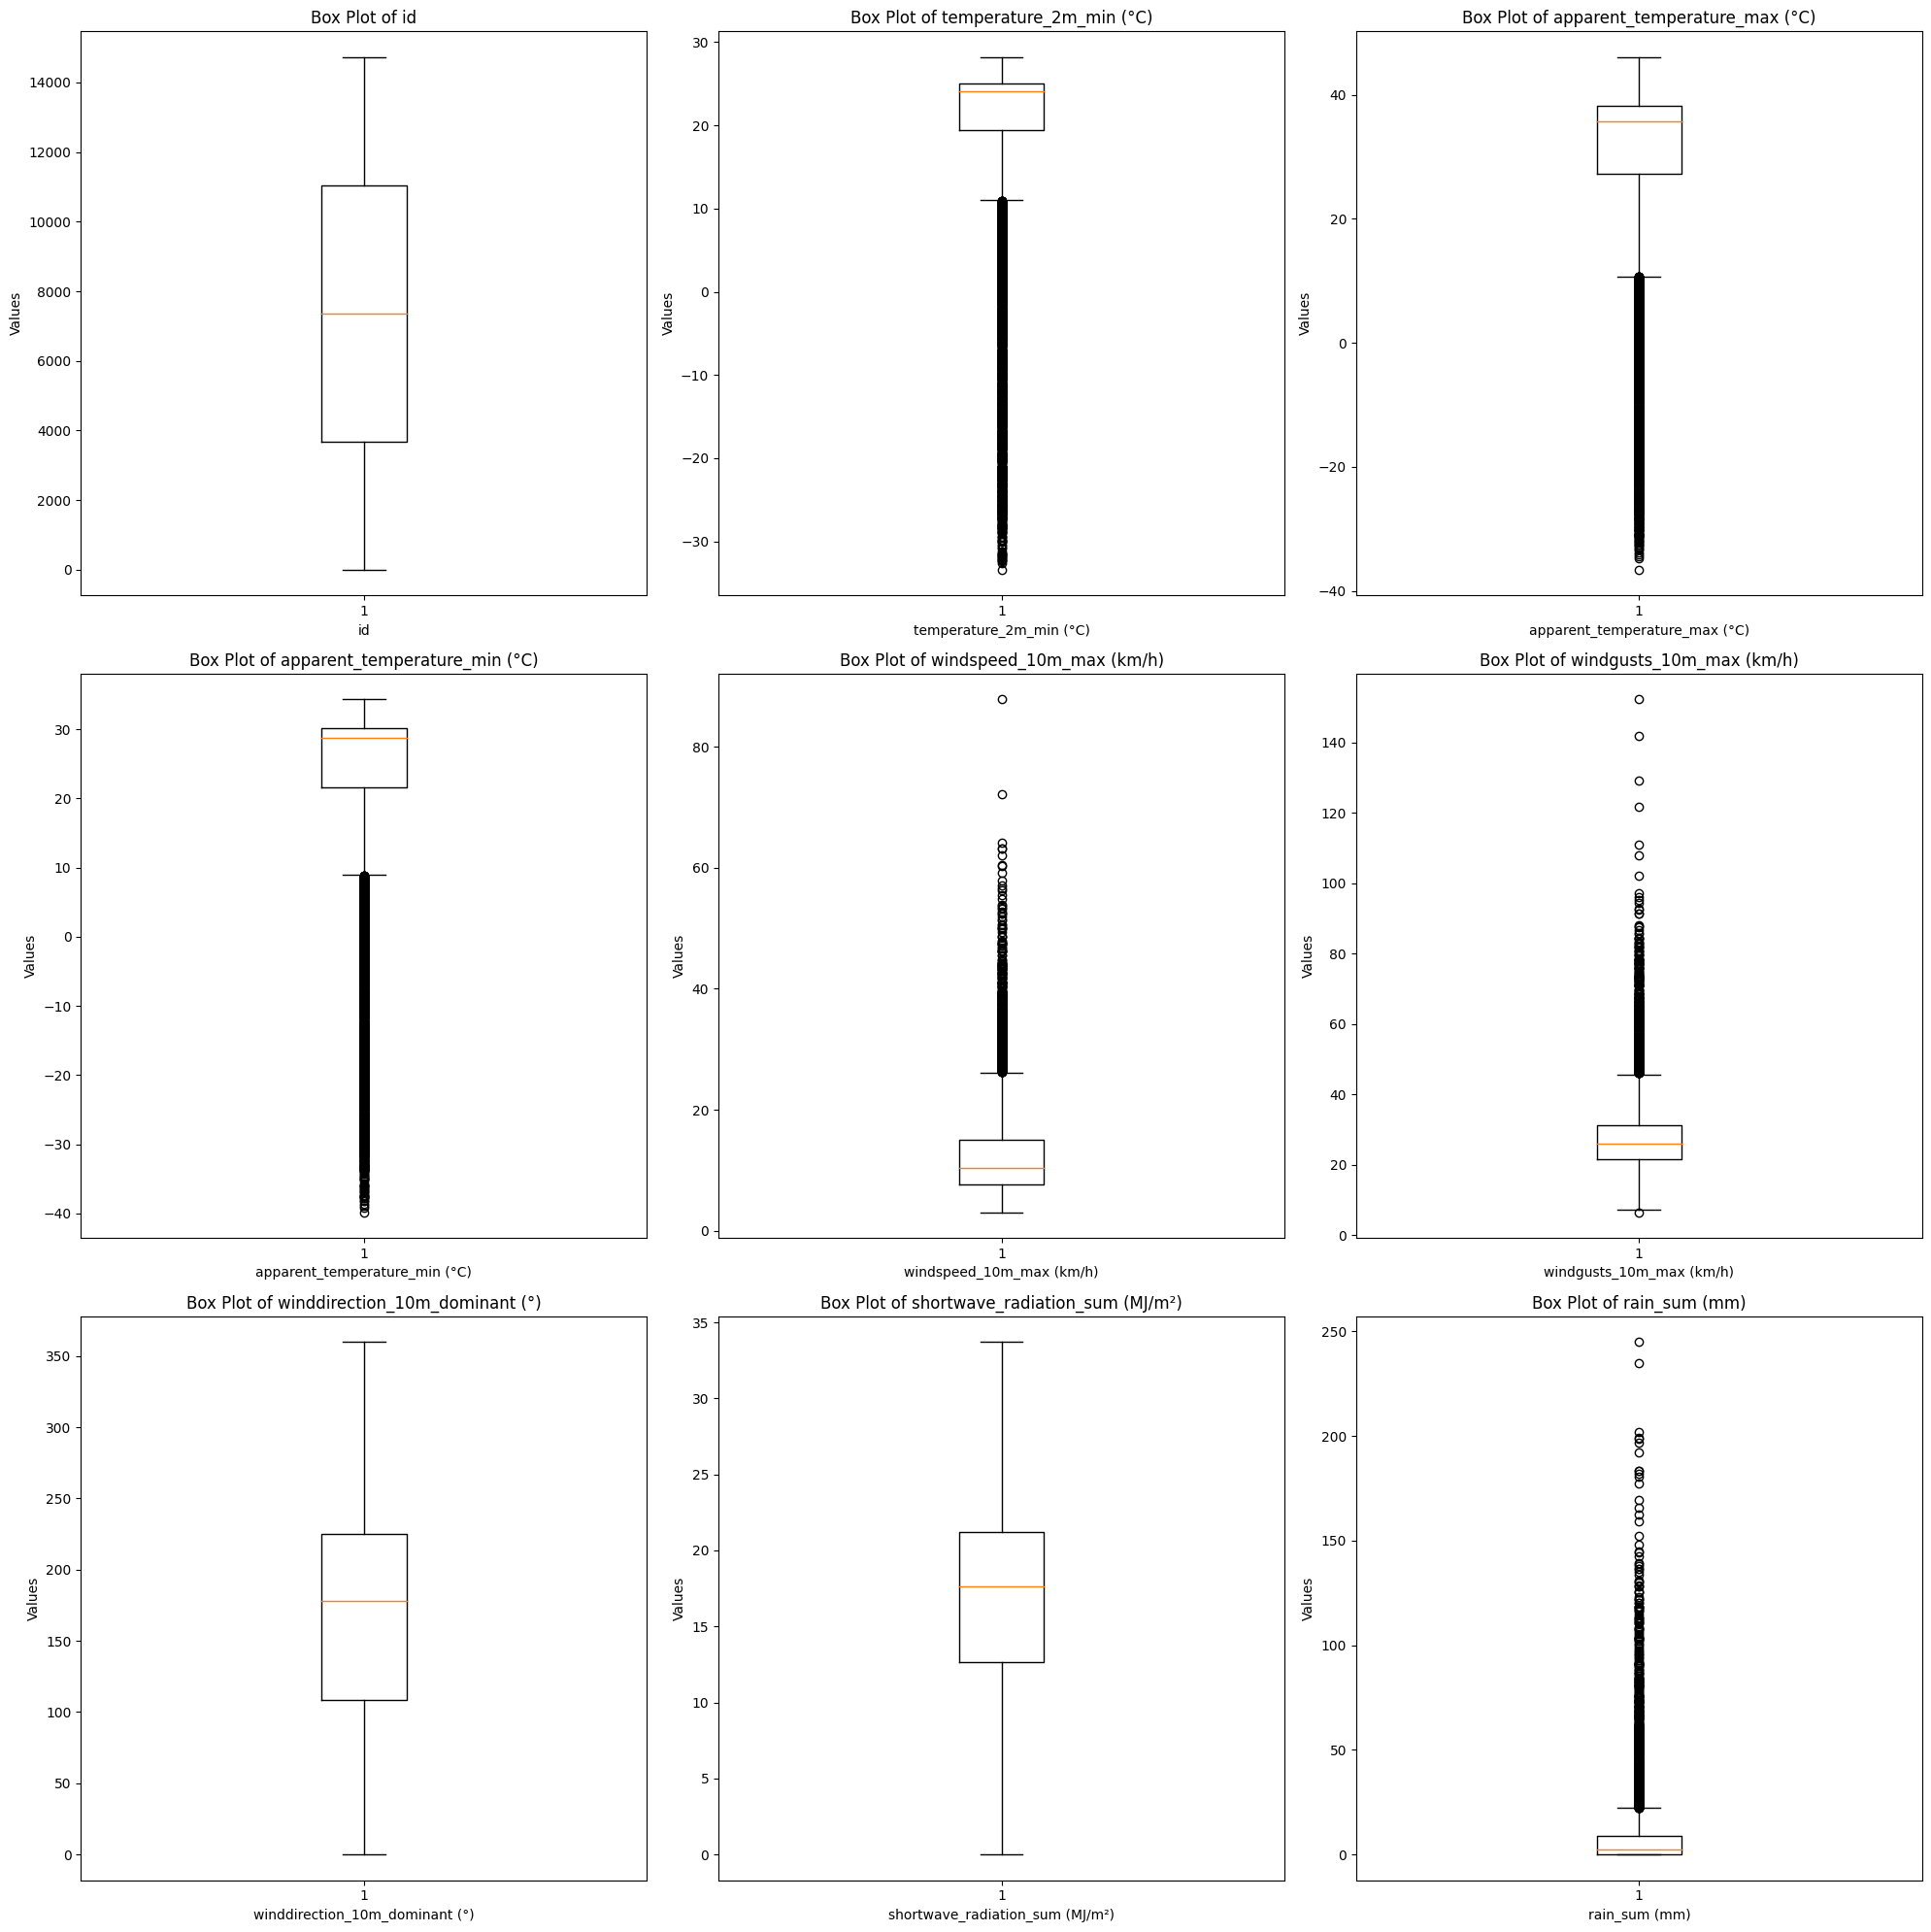

In [ ]:
num_cols = 3
num_rows = (len(num_df_harian.columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
axes = axes.flatten()

for i, column in enumerate(num_df_harian.columns):
    axes[i].boxplot(num_df_harian[column])
    axes[i].set_title(f"Box Plot of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Values")

if len(num_df_harian.columns) < num_rows * num_cols:
    for j in range(len(num_df_harian.columns), num_rows * num_cols):
        fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

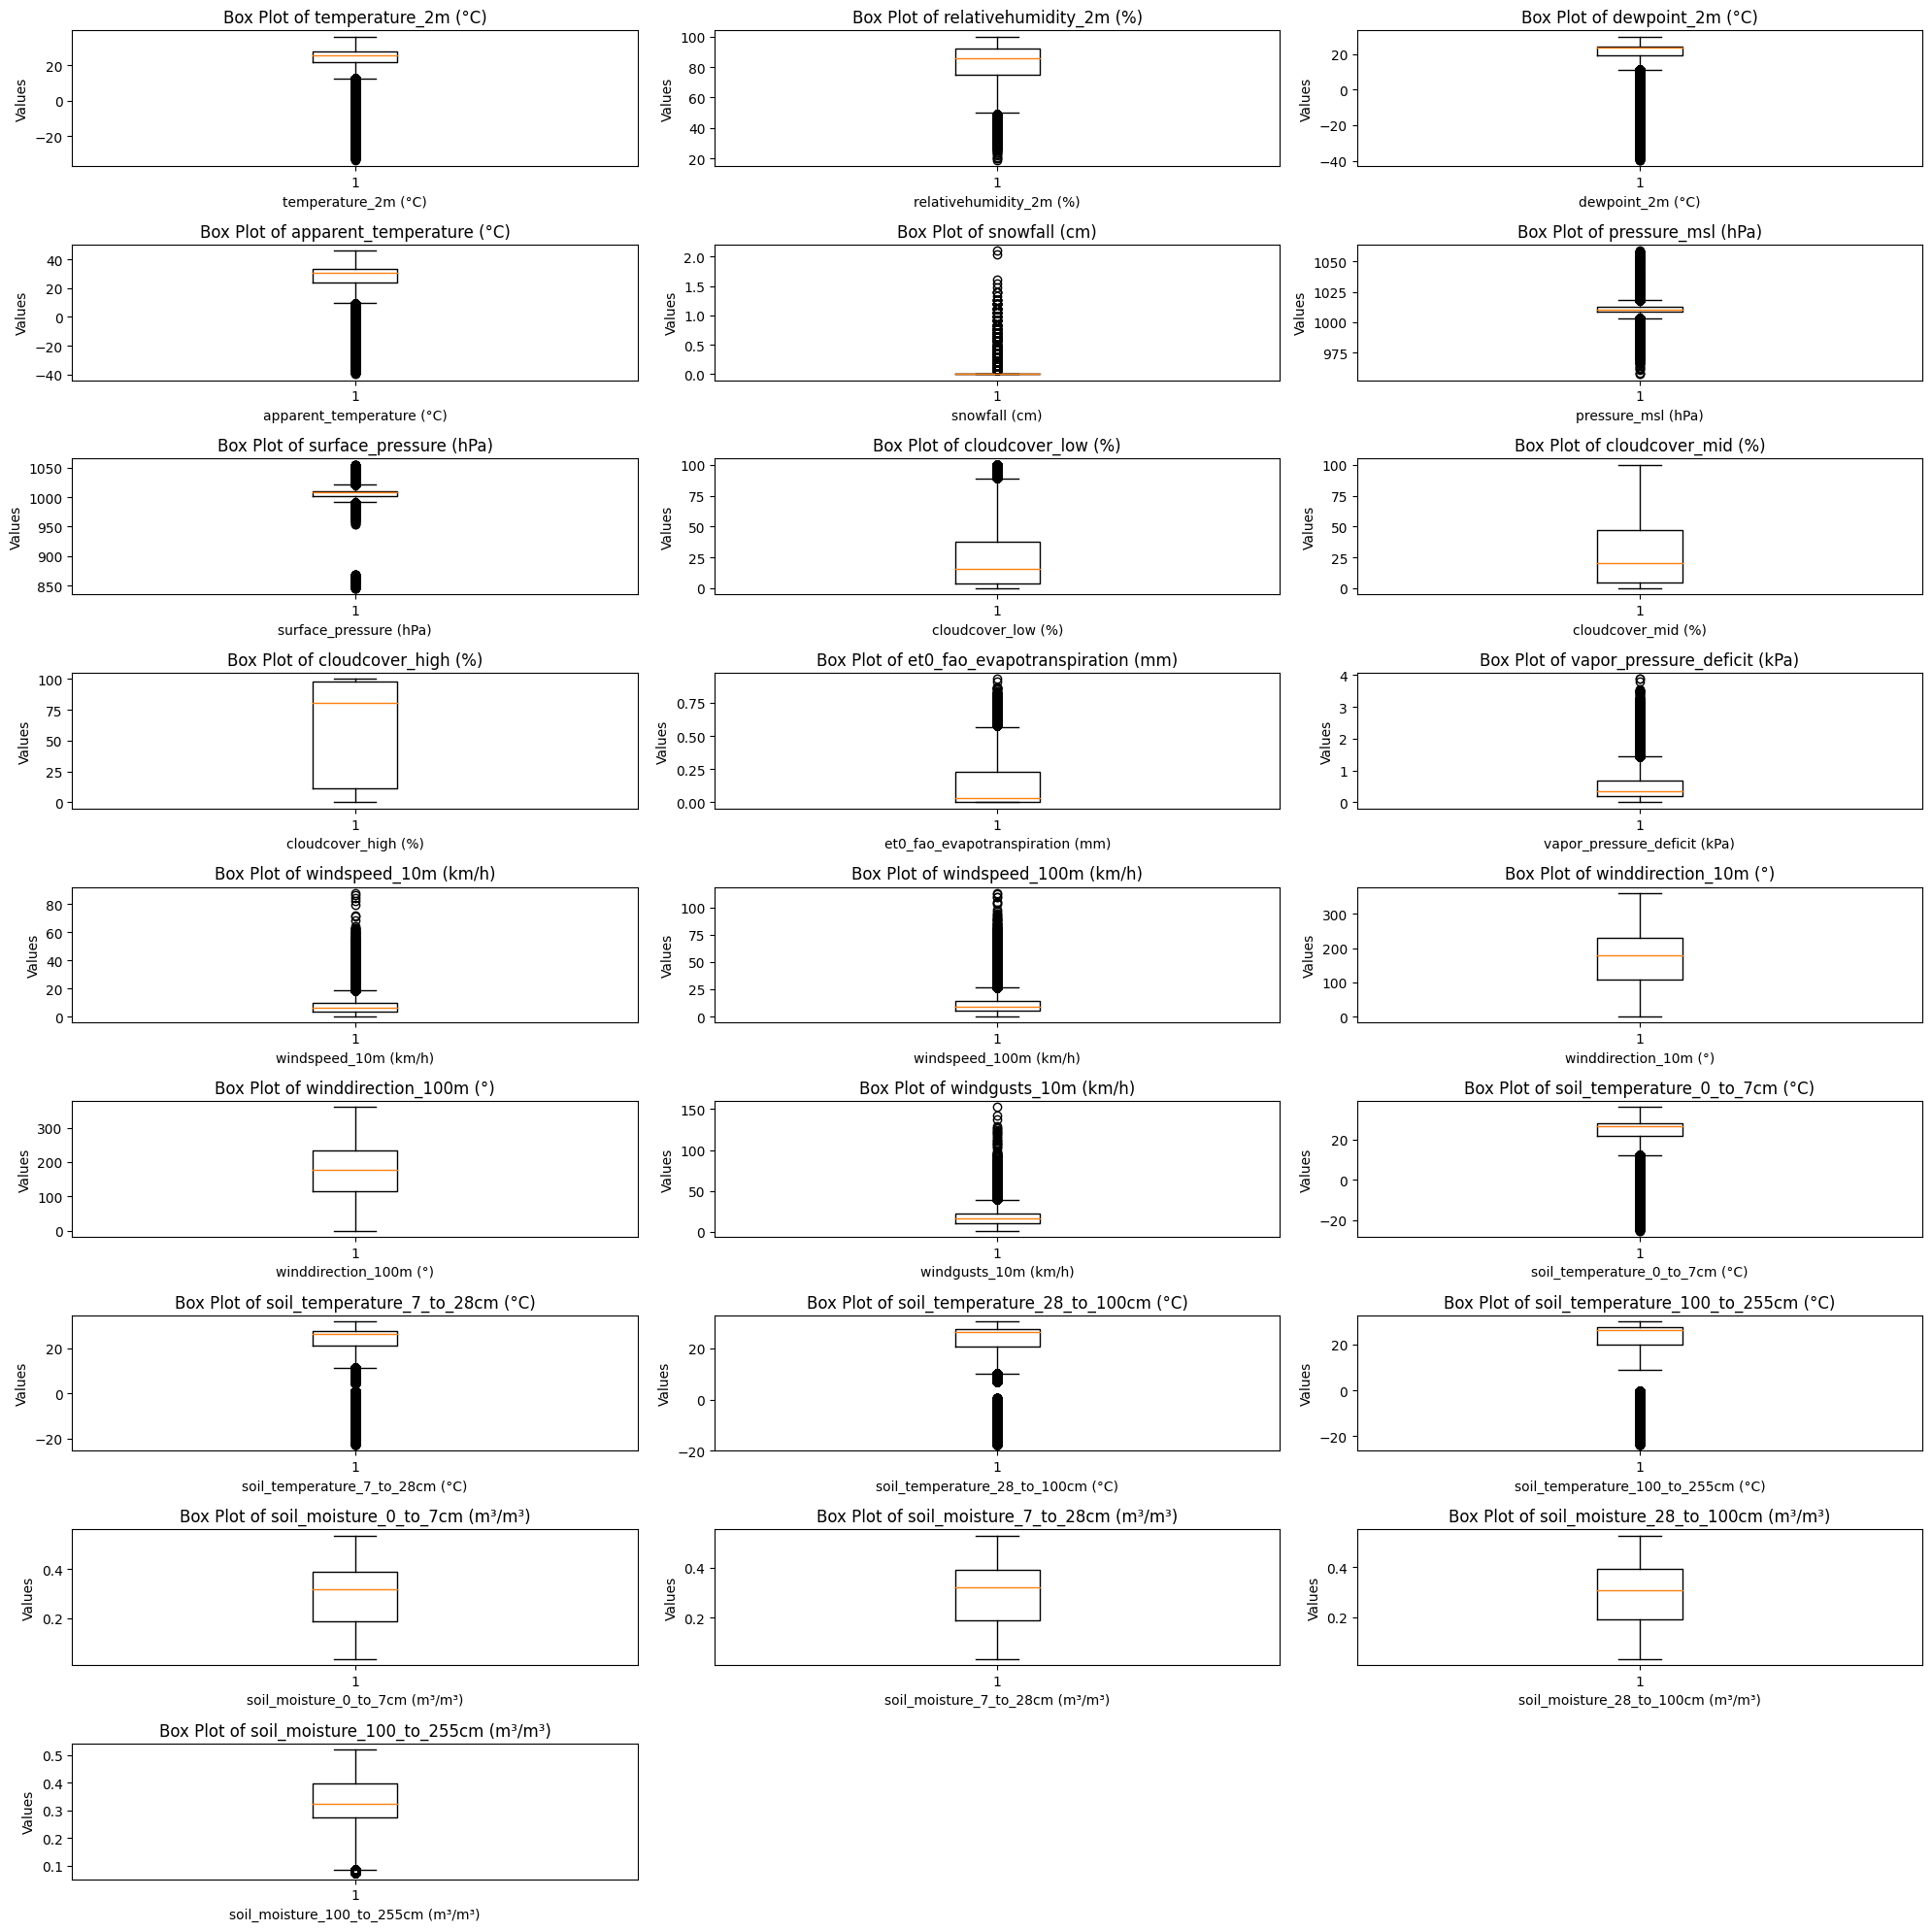

In [ ]:
num_cols = 3
num_rows = (len(num_df_jaman.columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
axes = axes.flatten()

for i, column in enumerate(num_df_jaman.columns):
    axes[i].boxplot(num_df_jaman[column])
    axes[i].set_title(f"Box Plot of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Values")

if len(num_df_jaman.columns) < num_rows * num_cols:
    for j in range(len(num_df_jaman.columns), num_rows * num_cols):
        fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

In [ ]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

In [ ]:
outliers = dict(check_outlier(df_train_harian).sum())

Outlier pada tiap atribut:
apparent_temperature_max (°C)      1822
apparent_temperature_min (°C)      2433
city                                  0
class                                 0
id                                    0
rain_sum (mm)                      1130
shortwave_radiation_sum (MJ/m²)       0
sunrise (iso8601)                     0
sunset (iso8601)                      0
temperature_2m_max (°C)               0
temperature_2m_min (°C)            2494
time                                  0
winddirection_10m_dominant (°)        0
windgusts_10m_max (km/h)            727
windspeed_10m_max (km/h)            630
dtype: int64


<ipython-input-61-0cc1ae9f8111>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-61-0cc1ae9f8111>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-61-0cc1ae9f8111>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_limit) | (df > upper_limit)


In [ ]:
outliers = dict(check_outlier(df_train_jaman).sum())

<ipython-input-61-0cc1ae9f8111>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-61-0cc1ae9f8111>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-61-0cc1ae9f8111>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_limit) | (df > upper_limit)


Outlier pada tiap atribut:
apparent_temperature (°C)             49820
city                                      0
cloudcover_high (%)                       0
cloudcover_low (%)                    23805
cloudcover_mid (%)                        0
dewpoint_2m (°C)                      62665
et0_fao_evapotranspiration (mm)       14782
pressure_msl (hPa)                    33163
relativehumidity_2m (%)                6003
snowfall (cm)                          4798
soil_moisture_0_to_7cm (m³/m³)            0
soil_moisture_100_to_255cm (m³/m³)     8727
soil_moisture_28_to_100cm (m³/m³)         0
soil_moisture_7_to_28cm (m³/m³)           0
soil_temperature_0_to_7cm (°C)        50895
soil_temperature_100_to_255cm (°C)    35352
soil_temperature_28_to_100cm (°C)     41723
soil_temperature_7_to_28cm (°C)       47427
surface_pressure (hPa)                78672
temperature_2m (°C)                   53225
time                                      0
vapor_pressure_deficit (kPa)          19722
windd

In [ ]:
#remove outlier
Q1 = df_train_harian.quantile(0.25)
Q3 = df_train_harian.quantile(0.75)
IQR = Q3 - Q1
outliers = (df_train_harian < (Q1 - 1.5 * IQR)) |(df_train_harian > (Q3 + 1.5 * IQR))

df_train_harian_clean = df_train_harian[~(outliers).any(axis=1)]
df_train_harian_clean

<ipython-input-64-4b23b6121e1b>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_train_harian.quantile(0.25)
<ipython-input-64-4b23b6121e1b>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_train_harian.quantile(0.75)
<ipython-input-64-4b23b6121e1b>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df_train_harian < (Q1 - 1.5 * IQR)) |(df_train_harian > (Q3 + 1.5 * IQR))


,id,time,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),city,rain_sum (mm),class
0,0,2018-01-01 00:00:00,33.2,24.3,39.0,28.8,2018-01-01 05:41:14,2018-01-01 18:09:47,10.8,23.0,257.02213,23.82,B,1.800000,Hujan Ringan
1,1,2018-01-02 00:00:00,33.0,25.1,40.0,29.2,2018-01-02 05:41:45,2018-01-02 18:10:12,9.5,19.4,230.53691,22.72,B,2.300000,Hujan Ringan
2,2,2018-01-03 00:00:00,31.3,24.9,38.3,30.3,2018-01-03 05:42:14,2018-01-03 18:10:35,11.1,23.8,275.63590,22.92,B,11.099999,Hujan Sedang
3,3,2018-01-04 00:00:00,31.2,25.9,37.8,31.8,2018-01-04 05:42:43,2018-01-04 18:10:58,11.0,31.7,241.11348,17.70,B,16.400000,Hujan Sedang
4,4,2018-01-05 00:00:00,29.6,25.4,34.3,29.6,2018-01-05 05:43:12,2018-01-05 18:11:20,17.3,33.1,246.59671,9.61,B,10.800000,Hujan Sedang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14724,14724,2023-04-09 00:00:00,25.0,15.2,25.5,16.2,2023-04-09 06:37:26,2023-04-09 19:13:21,12.8,36.0,259.20690,25.57,M,0.000000,Tidak Hujan
14726,14726,2023-04-11 00:00:00,25.4,17.0,25.0,15.7,2023-04-11 06:35:30,2023-04-11 19:14:16,13.5,38.5,254.80681,26.63,M,0.000000,Tidak Hujan
14727,14727,2023-04-12 00:00:00,25.5,13.5,26.0,13.7,2023-04-12 06:34:31,2023-04-12 19:14:43,10.9,35.3,267.60162,26.84,M,0.000000,Tidak Hujan
14728,14728,2023-04-13 00:00:00,25.5,14.5,26.6,15.0,2023-04-13 06:33:33,2023-04-13 19:15:11,11.2,34.6,230.55602,26.41,M,0.000000,Tidak Hujan


In [ ]:
#remove outlier
Q1 = df_train_jaman.quantile(0.25)
Q3 = df_train_jaman.quantile(0.75)
IQR = Q3 - Q1
outliers = (df_train_jaman < (Q1 - 1.5 * IQR)) |(df_train_jaman > (Q3 + 1.5 * IQR))

df_train_jaman_clean = df_train_jaman[~(outliers).any(axis=1)]
df_train_jaman_clean

<ipython-input-65-eb253260f35c>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_train_jaman.quantile(0.25)
<ipython-input-65-eb253260f35c>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_train_jaman.quantile(0.75)
<ipython-input-65-eb253260f35c>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df_train_jaman < (Q1 - 1.5 * IQR)) |(df_train_jaman > (Q3 + 1.5 * IQR))


,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),snowfall (cm),pressure_msl (hPa),surface_pressure (hPa),cloudcover_low (%),cloudcover_mid (%),...,windgusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),city
0,2018-01-01 00:00:00,25.4,91.0,23.9,30.6,0.0,1008.0,1005.8,7.0,10.0,...,9.4,28.1,28.4,28.3,28.7,0.326,0.315,0.282,0.270,B
1,2018-01-01 01:00:00,25.2,92.0,23.8,30.0,0.0,1007.4,1005.2,16.0,21.0,...,10.1,28.0,28.3,28.3,28.7,0.325,0.315,0.282,0.270,B
2,2018-01-01 02:00:00,25.1,92.0,23.8,29.8,0.0,1006.9,1004.7,7.0,8.0,...,14.8,28.0,28.2,28.3,28.7,0.324,0.315,0.283,0.270,B
3,2018-01-01 03:00:00,24.5,93.0,23.3,28.9,0.0,1006.0,1003.8,5.0,4.0,...,15.1,27.4,28.1,28.3,28.7,0.323,0.315,0.283,0.270,B
4,2018-01-01 04:00:00,24.3,94.0,23.3,28.9,0.0,1005.9,1003.7,2.0,3.0,...,14.0,27.2,28.0,28.3,28.7,0.322,0.315,0.283,0.270,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318163,2023-04-14 19:00:00,28.6,84.0,25.6,35.2,0.0,1010.0,1009.2,11.0,21.0,...,9.4,27.9,27.5,27.2,27.0,0.397,0.398,0.391,0.399,P
318164,2023-04-14 20:00:00,28.7,83.0,25.6,35.4,0.0,1010.2,1009.4,3.0,15.0,...,6.8,27.9,27.5,27.2,27.0,0.396,0.397,0.391,0.399,P
318165,2023-04-14 21:00:00,28.1,86.0,25.4,34.6,0.0,1010.5,1009.7,3.0,7.0,...,9.0,27.1,27.4,27.2,27.0,0.395,0.397,0.391,0.399,P
318166,2023-04-14 22:00:00,27.8,87.0,25.4,34.7,0.0,1010.5,1009.7,0.0,14.0,...,8.6,26.9,27.3,27.2,27.0,0.395,0.396,0.391,0.399,P


In [ ]:
check_outlier(df_train_harian).sum()

Outlier pada tiap atribut:
apparent_temperature_max (°C)      1822
apparent_temperature_min (°C)      2433
city                                  0
class                                 0
id                                    0
rain_sum (mm)                      1130
shortwave_radiation_sum (MJ/m²)       0
sunrise (iso8601)                     0
sunset (iso8601)                      0
temperature_2m_max (°C)               0
temperature_2m_min (°C)            2494
time                                  0
winddirection_10m_dominant (°)        0
windgusts_10m_max (km/h)            727
windspeed_10m_max (km/h)            630
dtype: int64


<ipython-input-61-0cc1ae9f8111>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-61-0cc1ae9f8111>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-61-0cc1ae9f8111>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_limit) | (df > upper_limit)


apparent_temperature_max (°C)      1822
apparent_temperature_min (°C)      2433
city                                  0
class                                 0
id                                    0
rain_sum (mm)                      1130
shortwave_radiation_sum (MJ/m²)       0
sunrise (iso8601)                     0
sunset (iso8601)                      0
temperature_2m_max (°C)               0
temperature_2m_min (°C)            2494
time                                  0
winddirection_10m_dominant (°)        0
windgusts_10m_max (km/h)            727
windspeed_10m_max (km/h)            630
dtype: int64

In [ ]:
check_outlier(df_train_harian).sum()

Outlier pada tiap atribut:
apparent_temperature_max (°C)      1822
apparent_temperature_min (°C)      2433
city                                  0
class                                 0
id                                    0
rain_sum (mm)                      1130
shortwave_radiation_sum (MJ/m²)       0
sunrise (iso8601)                     0
sunset (iso8601)                      0
temperature_2m_max (°C)               0
temperature_2m_min (°C)            2494
time                                  0
winddirection_10m_dominant (°)        0
windgusts_10m_max (km/h)            727
windspeed_10m_max (km/h)            630
dtype: int64


<ipython-input-61-0cc1ae9f8111>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-61-0cc1ae9f8111>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-61-0cc1ae9f8111>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_limit) | (df > upper_limit)


apparent_temperature_max (°C)      1822
apparent_temperature_min (°C)      2433
city                                  0
class                                 0
id                                    0
rain_sum (mm)                      1130
shortwave_radiation_sum (MJ/m²)       0
sunrise (iso8601)                     0
sunset (iso8601)                      0
temperature_2m_max (°C)               0
temperature_2m_min (°C)            2494
time                                  0
winddirection_10m_dominant (°)        0
windgusts_10m_max (km/h)            727
windspeed_10m_max (km/h)            630
dtype: int64

In [ ]:
check_outlier(df_train_jaman).sum()

<ipython-input-61-0cc1ae9f8111>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-61-0cc1ae9f8111>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-61-0cc1ae9f8111>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_limit) | (df > upper_limit)


Outlier pada tiap atribut:
apparent_temperature (°C)             49820
city                                      0
cloudcover_high (%)                       0
cloudcover_low (%)                    23805
cloudcover_mid (%)                        0
dewpoint_2m (°C)                      62665
et0_fao_evapotranspiration (mm)       14782
pressure_msl (hPa)                    33163
relativehumidity_2m (%)                6003
snowfall (cm)                          4798
soil_moisture_0_to_7cm (m³/m³)            0
soil_moisture_100_to_255cm (m³/m³)     8727
soil_moisture_28_to_100cm (m³/m³)         0
soil_moisture_7_to_28cm (m³/m³)           0
soil_temperature_0_to_7cm (°C)        50895
soil_temperature_100_to_255cm (°C)    35352
soil_temperature_28_to_100cm (°C)     41723
soil_temperature_7_to_28cm (°C)       47427
surface_pressure (hPa)                78672
temperature_2m (°C)                   53225
time                                      0
vapor_pressure_deficit (kPa)          19722
windd

apparent_temperature (°C)             49820
city                                      0
cloudcover_high (%)                       0
cloudcover_low (%)                    23805
cloudcover_mid (%)                        0
dewpoint_2m (°C)                      62665
et0_fao_evapotranspiration (mm)       14782
pressure_msl (hPa)                    33163
relativehumidity_2m (%)                6003
snowfall (cm)                          4798
soil_moisture_0_to_7cm (m³/m³)            0
soil_moisture_100_to_255cm (m³/m³)     8727
soil_moisture_28_to_100cm (m³/m³)         0
soil_moisture_7_to_28cm (m³/m³)           0
soil_temperature_0_to_7cm (°C)        50895
soil_temperature_100_to_255cm (°C)    35352
soil_temperature_28_to_100cm (°C)     41723
soil_temperature_7_to_28cm (°C)       47427
surface_pressure (hPa)                78672
temperature_2m (°C)                   53225
time                                      0
vapor_pressure_deficit (kPa)          19722
winddirection_100m (°)          

#### Menghapus Atribut Redundan

#### Transformasi Data

In [ ]:
def remove_unwanted_words(temperature_2m_max):
    unwanted_words = ['drjt', 'derajat', 'celcius']
    replacement_words = ['', '', '']

    for i in range(len(unwanted_words)):
        temperature_2m_max = temperature_2m_max.replace(unwanted_words[i], replacement_words[i])

    return temperature_2m_max

df_train_harian['temperature_2m_max (°C)'] = df_train_harian['temperature_2m_max (°C)'].apply(lambda x: ', '.join(sorted(set([temperature_2m_max.strip().lower() for temperature_2m_max in x.split(',')]))))
df_train_harian['temperature_2m_max (°C)'] = df_train_harian['temperature_2m_max (°C)'].apply(remove_unwanted_words)
df_train_harian['temperature_2m_max (°C)'] = df_train_harian['temperature_2m_max (°C)'].apply(lambda x: ', '.join(sorted(set([temperature_2m_max.strip().lower() for temperature_2m_max in x.split(',')]))))


In [ ]:
unique_names = df_train_harian['class'].unique()

print(unique_names)

['Hujan Ringan' 'Hujan Sedang' 'Hujan Lebat' 'Tidak Hujan'
 'Hujan Sangat Lebat']


In [ ]:
unique_names = df_train_harian['temperature_2m_max (°C)'].unique()

print(unique_names)

['33.2' '33.0' '31.3' '31.2' '29.6' '31.1' '30.0' '29.7' '31.0' '30.5'
 '29.4' '28.6' '28.9' '27.5' '29.0' '30.9' '28.1' '30.3' '30.2' '28.7'
 '28.0' '29.9' '30.7' '29.3' '27.8' '28.5' '29.5' '30.1' '29.2' '27.7'
 '30.6' '30.4' '31.9' '31.6' '30.8' '33.1' '31.8' '31.7' '32.1' '29.8'
 '32.6' '31.4' '32.0' '32.5' '32.3' '31.5' '32.8' '32.2' '28.8' '28.4'
 '32.4' '33.4' '32.9' '32.7' '27.2' '34.2' '33.5' '34.5' '33.6' '33.3'
 '33.9' '34.3' '34.4' '33.8' '33.7' '29.1' '27.9' '27.0' '34.6' '34.0'
 '34.7' '35.7' '35.5' '35.0' '27.4' '27.6' '26.7' '28.3' '28.2' '26.9'
 '-18.5' '-19.1' '-24.1' '-24.8' '-25.1' '-18.2' '-15.5' '-17.4' '-16.5'
 '-16.7' '-5.4' '-7.8' '-15.6' '-17.2' '-18.0' '-13.2' '-17.3' '-11.7'
 '-11.0' '-12.9' '-14.2' '-19.5' '-22.7' '-23.8' '-22.2' '-22.6' '-24.0'
 '-23.9' '-20.5' '-20.8' '-23.7' '-22.0' '-19.4' '-13.5' '-20.2' '-21.4'
 '-27.3' '-26.2' '-27.5' '-25.2' '-22.8' '-22.5' '-19.3' '-24.3' '-11.5'
 '-12.1' '-8.1' '-20.4' '-17.6' '-22.1' '-21.0' '-12.6' '-9.7' '-9.2'